#Machine Learning
`Autor: Erwing FC 
~erwingforerocastro@gmail.com`

###Evaluacion para clasificación

In [ ]:
#%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

dataset = load_digits()
X, y = dataset.data, dataset.target

variance=np.array([])

for class_name, class_count in zip(dataset.target_names, np.bincount(dataset.target)):
    print(class_name,class_count)
    variance=np.append(variance,class_count)

print(f'varianza: {np.var(variance)}')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180
varianza: 6.81


In [ ]:
#imbalanciar el dataset
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print('etiquetas originales:\t', y[1:30])
print('etiquetas nuevas binarias:\t', y_binary_imbalanced[1:30])

etiquetas originales:	 [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
etiquetas nuevas binarias:	 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [ ]:
np.bincount(y_binary_imbalanced)

array([1615,  182])

In [ ]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

svm = SVC(kernel='rbf', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9955555555555555

###Clasificadores tontos

DummyClassifier es un clasificador que realiza predicciones utilizando reglas simples, que pueden ser útiles como referencia para la comparación con clasificadores reales, especialmente con clases desequilibradas.

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
y_dummy_predictions = dummy_majority.predict(X_test)
y_dummy_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
dummy_majority.score(X_test, y_test)

0.9044444444444445

In [ ]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9777777777777777

###Matrices de confusión

In [ ]:
from sklearn.metrics import confusion_matrix

dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
y_majority_predicted = dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_majority_predicted)

print('Clase mas frecuente (dummy classifier)\n', confusion)
# TN FP
# FN TP

Clase mas frecuente (dummy classifier)
 [[407   0]
 [ 43   0]]


In [ ]:
# produce predicciones aleatorias con la misma proporción de clase que el conjunto de entrenamiento
dummy_classprop = DummyClassifier(strategy='stratified').fit(X_train, y_train)
y_classprop_predicted = dummy_classprop.predict(X_test)
confusion = confusion_matrix(y_test, y_classprop_predicted)

print('Prediccion clase-proporcional aleatoria (dummy classifier)\n', confusion)

Prediccion clase-proporcional aleatoria (dummy classifier)
 [[364  43]
 [ 40   3]]


In [ ]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)

print('Clasificador de vectores de soporte (linear kernel, C=1)\n', confusion)

Clasificador de vectores de soporte (linear kernel, C=1)
 [[402   5]
 [  5  38]]


In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=5000).fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted)

print('Clasificación de regresion logistica (default settings)\n', confusion)

Clasificación de regresion logistica (default settings)
 [[403   4]
 [  7  36]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
tree_predicted = dt.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)

print('Clasificador de arboles de descición (max_depth = 2)\n', confusion)

Clasificador de arboles de descición (max_depth = 2)
 [[400   7]
 [ 17  26]]


###Metricas de evaluación para clasificación binaria

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  También conocido como sensibilidad o frecuencia positiva verdadera
# F1 = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, tree_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, tree_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, tree_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, tree_predicted))) 

Accuracy: 0.95
Precision: 0.79
Recall: 0.60
F1: 0.68


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, tree_predicted, target_names=['no 1', '1']))

              precision    recall  f1-score   support

        no 1       0.96      0.98      0.97       407
           1       0.79      0.60      0.68        43

    accuracy                           0.95       450
   macro avg       0.87      0.79      0.83       450
weighted avg       0.94      0.95      0.94       450



In [ ]:
print('Clase proporcional aleatoria (dummy)\n', 
      classification_report(y_test, y_classprop_predicted, target_names=['no 1', '1']))
print('SVM\n', 
      classification_report(y_test, svm_predicted, target_names = ['no 1', '1']))
print('Regresión logistica\n', 
      classification_report(y_test, lr_predicted, target_names = ['no 1', '1']))
print('Arbol de descición\n', 
      classification_report(y_test, tree_predicted, target_names = ['no 1', '1']))

Clase proporcional aleatoria (dummy)
               precision    recall  f1-score   support

        no 1       0.90      0.89      0.90       407
           1       0.07      0.07      0.07        43

    accuracy                           0.82       450
   macro avg       0.48      0.48      0.48       450
weighted avg       0.82      0.82      0.82       450

SVM
               precision    recall  f1-score   support

        no 1       0.99      0.99      0.99       407
           1       0.88      0.88      0.88        43

    accuracy                           0.98       450
   macro avg       0.94      0.94      0.94       450
weighted avg       0.98      0.98      0.98       450

Regresión logistica
               precision    recall  f1-score   support

        no 1       0.98      0.99      0.99       407
           1       0.90      0.84      0.87        43

    accuracy                           0.98       450
   macro avg       0.94      0.91      0.93       450
weighted a

###Funciones de descición

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)
y_score_list = list(zip(y_test[0:20], y_scores_lr[0:20]))

y_score_list

[(0, -34.62965251715387),
 (0, -18.00710189145109),
 (0, -20.988652510884364),
 (0, -36.81475273707072),
 (0, -39.34052770966422),
 (0, -18.86401210271846),
 (1, 6.00209778367665),
 (0, -32.728067269954025),
 (0, -35.48770649439418),
 (0, -37.35612652392992),
 (0, -25.031654624437433),
 (0, -21.402724114279327),
 (0, -36.510711972661504),
 (0, -15.923500682245841),
 (0, -12.840715945923545),
 (0, -13.727416129759074),
 (1, 14.769298407410023),
 (0, -39.40761878266293),
 (0, -26.109597780480243),
 (0, -28.43756047452812)]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_proba_lr = lr.fit(X_train, y_train).predict_proba(X_test)
y_proba_list = list(zip(y_test[0:20], y_proba_lr[0:20,1]))

y_proba_list

[(0, 9.131308204909588e-16),
 (0, 1.512220102166667e-08),
 (0, 7.669093481894798e-10),
 (0, 1.0269659245898714e-16),
 (0, 8.215346784973234e-18),
 (0, 6.418944703630233e-09),
 (1, 0.9975325456496914),
 (0, 6.114782039708659e-15),
 (0, 3.8715501930294285e-16),
 (0, 5.97641002227618e-17),
 (0, 1.3455211343365045e-11),
 (0, 5.068915123671552e-10),
 (0, 1.3918718769334918e-16),
 (0, 1.2148186996103043e-07),
 (0, 2.6506157232919956e-06),
 (0, 1.0920900487132936e-06),
 (1, 0.9999996147212707),
 (0, 7.682253212927166e-18),
 (0, 4.578737638915673e-12),
 (0, 4.4640022735828206e-13)]

###Curvas precision-recall

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


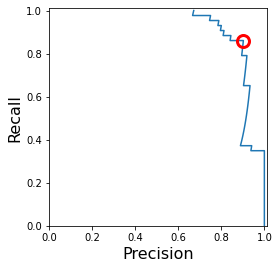

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure(facecolor='w')
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curva')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

###Curvas ROC, Area bajo la curva (AUC)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


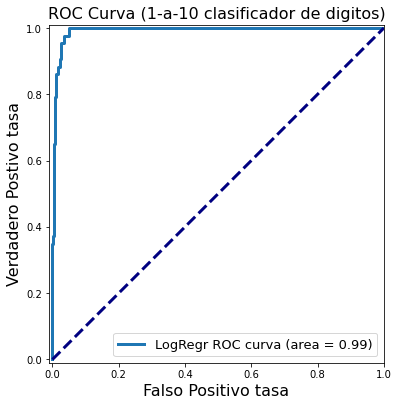

In [ ]:
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

y_score_lr = lr.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(facecolor='w',figsize=(6,12))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curva (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('Falso Positivo tasa', fontsize=16)
plt.ylabel('Verdadero Postivo tasa', fontsize=16)
plt.title('ROC Curva (1-a-10 clasificador de digitos)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

gamma = 0.01  accuracy = 0.91   AUC = 1.00
gamma = 0.10  accuracy = 0.90   AUC = 0.98
gamma = 0.20  accuracy = 0.90   AUC = 0.66
gamma = 1.00  accuracy = 0.90   AUC = 0.50


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


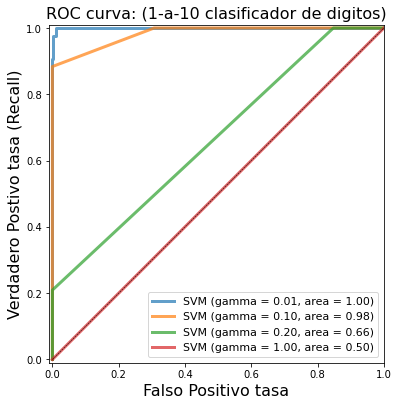

In [ ]:
from matplotlib import cm

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

plt.figure(facecolor='w',figsize=(6,12))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for g in [0.01, 0.1, 0.20, 1]:
    svm = SVC(gamma=g).fit(X_train, y_train)
    y_score_svm = svm.decision_function(X_test)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    accuracy_svm = svm.score(X_test, y_test)
    print("gamma = {:.2f}  accuracy = {:.2f}   AUC = {:.2f}".format(g, accuracy_svm, 
                                                                    roc_auc_svm))
    plt.plot(fpr_svm, tpr_svm, lw=3, alpha=0.7, 
             label='SVM (gamma = {:0.2f}, area = {:0.2f})'.format(g, roc_auc_svm))

plt.xlabel('Falso Positivo tasa', fontsize=16)
plt.ylabel('Verdadero Postivo tasa (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curva: (1-a-10 clasificador de digitos)', fontsize=16)
plt.axes().set_aspect('equal')

plt.show()

###Medidas de evaluación para clasificación multi-clase.

######Matriz de confusión multi-clase

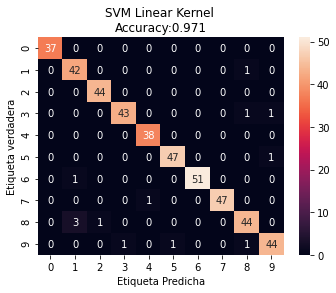

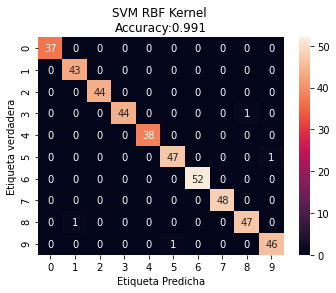

In [ ]:
dataset = load_digits()
X, y = dataset.data, dataset.target
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X, y, random_state=0)


svm = SVC(kernel = 'linear').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, 
                     index = [i for i in range(0,10)], columns = [i for i in range(0,10)])

plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, 
                                                                       svm_predicted_mc)))
plt.ylabel('Etiqueta verdadera')
plt.xlabel('Etiqueta Predicha')


svm = SVC(kernel = 'rbf').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, index = [i for i in range(0,10)],
                  columns = [i for i in range(0,10)])

plt.figure(figsize = (5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM RBF Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, 
                                                                    svm_predicted_mc)))
plt.ylabel('Etiqueta verdadera')
plt.xlabel('Etiqueta Predicha');

In [ ]:
print(classification_report(y_test_mc, svm_predicted_mc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.98      1.00      0.99        43
           2       1.00      1.00      1.00        44
           3       1.00      0.98      0.99        45
           4       1.00      1.00      1.00        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        48
           8       0.98      0.98      0.98        48
           9       0.98      0.98      0.98        47

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



######Mediciones micro y macro promediadas

Macro-avg:

[0,1,0] clase naranja es 1/3 

[1,1,1,0,0] clase manzana es 3/5

Macro-avg: (1/3+3/5)/2

-----En cambio-------

Micro-avg: [1,0,0,0,0,1,1,1] = 4/8

In [ ]:
print('Micro-promedio precision = {:.2f} (tratar las instancias por igual)'
      .format(precision_score(y_test_mc, svm_predicted_mc, average = 'micro')))
print('Macro-promedio precision = {:.2f} (tratar las clases por igual)'
      .format(precision_score(y_test_mc, svm_predicted_mc, average = 'macro')))

Micro-promedio precision = 0.99 (tratar las instancias por igual)
Macro-promedio precision = 0.99 (tratar las clases por igual)


In [ ]:
print('Micro-promedio f1 = {:.2f} (tratar las instancias por igual)'
      .format(f1_score(y_test_mc, svm_predicted_mc, average = 'micro')))
print('Macro-promedio f1 = {:.2f} (tratar las clases por igual)'
      .format(f1_score(y_test_mc, svm_predicted_mc, average = 'macro')))

Micro-promedio f1 = 0.99 (tratar las instancias por igual)
Macro-promedio f1 = 0.99 (tratar las clases por igual)


###Metricas de evaluación de regresion

Modelo lineal, coeficientes:  [-698.80206267]
Error cuadratico medio (dummy): 4965.13
Error cuadratico medio (modelo lineal): 4646.74
r2_score (dummy): -0.00
r2_score (modelo lineal): 0.06


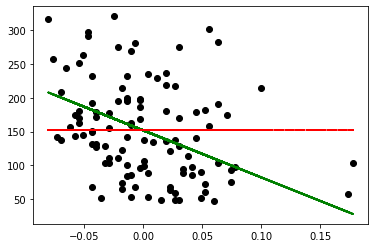

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor

diabetes = datasets.load_diabetes()

X = diabetes.data[:, None, 6]
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lm = LinearRegression().fit(X_train, y_train)
lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train)

y_predict = lm.predict(X_test)
y_predict_dummy_mean = lm_dummy_mean.predict(X_test)

print('Modelo lineal, coeficientes: ', lm.coef_)
print("Error cuadratico medio (dummy): {:.2f}".format(mean_squared_error(y_test, 
                                                                     y_predict_dummy_mean)))
print("Error cuadratico medio (modelo lineal): {:.2f}".format(mean_squared_error(y_test, y_predict)))
print("r2_score (dummy): {:.2f}".format(r2_score(y_test, y_predict_dummy_mean)))
print("r2_score (modelo lineal): {:.2f}".format(r2_score(y_test, y_predict)))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_predict, color='green', linewidth=2)
plt.plot(X_test, y_predict_dummy_mean, color='red', linestyle = 'dashed', 
         linewidth=2, label = 'dummy')

plt.show()

###Seleccion del modelo usando metricas de evaluación

######Ejemplo Cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

dataset = load_digits()
X, y = dataset.data, dataset.target == 1
clf = SVC(kernel='linear', C=1)

print('Cross-validation (accuracy)', cross_val_score(clf, X, y, cv=5))
print('Cross-validation (AUC)', cross_val_score(clf, X, y, cv=5, scoring = 'roc_auc'))
print('Cross-validation (recall)', cross_val_score(clf, X, y, cv=5, scoring = 'recall'))

Cross-validation (accuracy) [0.91944444 0.98611111 0.97214485 0.97493036 0.96935933]
Cross-validation (AUC) [0.9641871  0.9976571  0.99372205 0.99699002 0.98675611]
Cross-validation (recall) [0.81081081 0.89189189 0.83333333 0.83333333 0.83333333]


######Ejemplo Grid-search

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = SVC(kernel='rbf')
grid_values = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test) 

print('Grid mejor parametro (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid mejor puntuacion (accuracy): ', grid_clf_acc.best_score_)


grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, scoring = 'roc_auc')
grid_clf_auc.fit(X_train, y_train)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test) 

print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid mejor parametro (max. AUC): ', grid_clf_auc.best_params_)
print('Grid mejor puntuacion (AUC): ', grid_clf_auc.best_score_)

Grid mejor parametro (max. accuracy):  {'gamma': 0.001}
Grid mejor puntuacion (accuracy):  0.9985157648354676
Test set AUC:  0.99982858122393
Grid mejor parametro (max. AUC):  {'gamma': 0.001}
Grid mejor puntuacion (AUC):  1.0


######Métricas de evaluación compatibles para la selección del modelo

In [ ]:
from sklearn.metrics.scorer import SCORERS

print(sorted(list(SCORERS.keys())))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'v_measure_score']


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


###Ejemplo de clasificación de dos características utilizando el conjunto de datos de dígitos

######Optimizar un clasificador utilizando diferentes métricas de evaluación

Grid Mejor parametro (max. precision): {'class_weight': {1: 2}}
Grid Mejor puntuacion (precision): 0.5344089635854342
Grid Mejor parametro (max. recall): {'class_weight': {1: 50}}
Grid Mejor puntuacion (recall): 0.9142857142857143
Grid Mejor parametro (max. f1): {'class_weight': {1: 3}}
Grid Mejor puntuacion (f1): 0.5350404318234381
Grid Mejor parametro (max. roc_auc): {'class_weight': {1: 4}}
Grid Mejor puntuacion (roc_auc): 0.8913669485717769


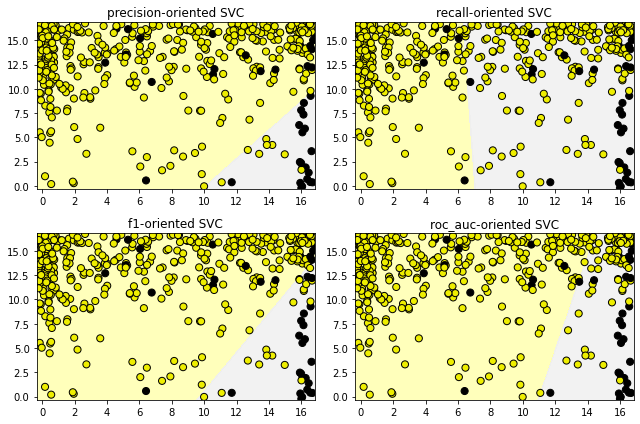

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot  #subimos adspy_shared_utilities.py
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

jitter_delta = 0.25
X_twovar_train = X_train[:,[20,59]]+ np.random.rand(X_train.shape[0], 2) - jitter_delta
X_twovar_test  = X_test[:,[20,59]] + np.random.rand(X_test.shape[0], 2) - jitter_delta

clf = SVC(kernel = 'linear').fit(X_twovar_train, y_train)
grid_values = {'class_weight':['balanced', {1:2},{1:3},{1:4},{1:5},{1:10},{1:20},{1:50}]}
plt.figure(figsize=(9,6),facecolor='w')

for i, eval_metric in enumerate(('precision','recall', 'f1','roc_auc')):
    grid_clf_custom = GridSearchCV(clf, param_grid=grid_values, scoring=eval_metric)
    grid_clf_custom.fit(X_twovar_train, y_train)
    print('Grid Mejor parametro (max. {0}): {1}'
          .format(eval_metric, grid_clf_custom.best_params_))
    print('Grid Mejor puntuación ({0}): {1}'
          .format(eval_metric, grid_clf_custom.best_score_))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plot_class_regions_for_classifier_subplot(grid_clf_custom, X_twovar_test, y_test, None,
                                             None, None,  plt.subplot(2, 2, i+1))
    
    plt.title(eval_metric+'-oriented SVC')
plt.tight_layout()
plt.show()

######Curva precision-recall para el clasificador SVC predeterminado (con pesos de clase equilibrados)

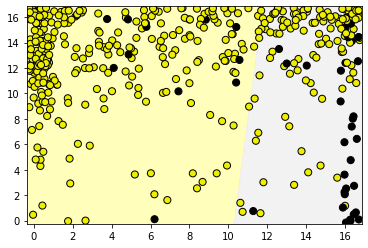

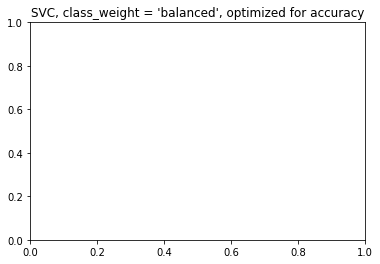

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


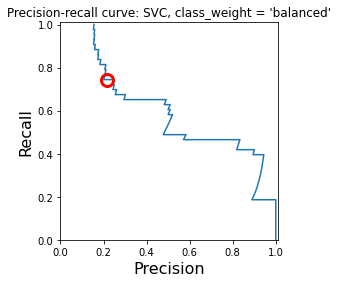

En el umbral cero, precision: 0.21, recall: 0.74


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from adspy_shared_utilities import plot_class_regions_for_classifier
from sklearn.svm import SVC

dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

jitter_delta = 0.25
X_twovar_train = X_train[:,[20,59]]+ np.random.rand(X_train.shape[0], 2) - jitter_delta
X_twovar_test  = X_test[:,[20,59]] + np.random.rand(X_test.shape[0], 2) - jitter_delta

clf = SVC(kernel='linear', class_weight='balanced').fit(X_twovar_train, y_train)

y_scores = clf.decision_function(X_twovar_test)

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plot_class_regions_for_classifier(clf, X_twovar_test, y_test)
plt.title("SVC, class_weight = 'balanced', optimized for accuracy")
plt.show()

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.title ("Precision-recall curve: SVC, class_weight = 'balanced'")
plt.plot(precision, recall, label = 'Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize=12, fillstyle='none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()
print('En el umbral cero, precision: {:.2f}, recall: {:.2f}'
      .format(closest_zero_p, closest_zero_r))